<a href="https://colab.research.google.com/github/Aman-Kumar45/climaman-webapp/blob/main/Moon_landslide_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving M176791784RE_thumb.png to M176791784RE_thumb.png


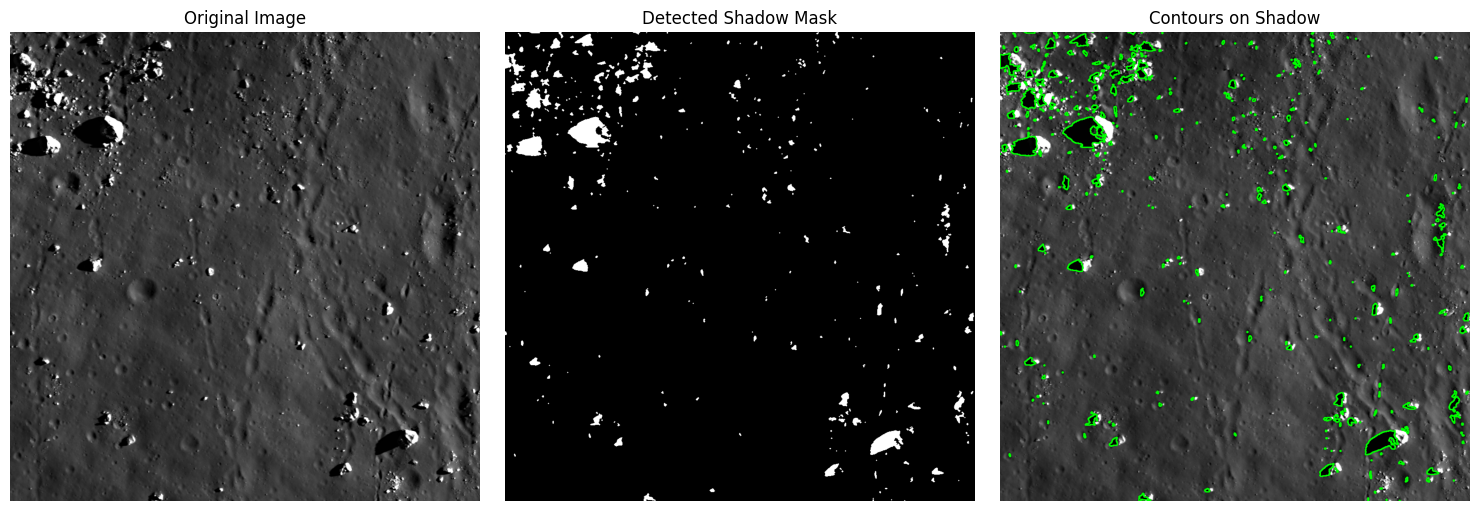

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# STEP 1: Read your uploaded image
image_path = "/content/M176791784RE_thumb.png"  # Yahan tum apni image ka exact naam likho
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# STEP 2: Shadow detection using threshold
_, shadow_mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)

# STEP 3: Clean up shadow mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
cleaned_shadow = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)

# STEP 4: Find contours of shadow
contours, _ = cv2.findContours(cleaned_shadow, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# STEP 5: Draw shadow contours
shadow_detected_img = img.copy()
cv2.drawContours(shadow_detected_img, contours, -1, (0, 255, 0), 2)

# STEP 6: Show output
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(cleaned_shadow, cmap='gray')
axs[1].set_title("Detected Shadow Mask")
axs[1].axis("off")

axs[2].imshow(cv2.cvtColor(shadow_detected_img, cv2.COLOR_BGR2RGB))
axs[2].set_title("Contours on Shadow")
axs[2].axis("off")

plt.tight_layout()
plt.show()


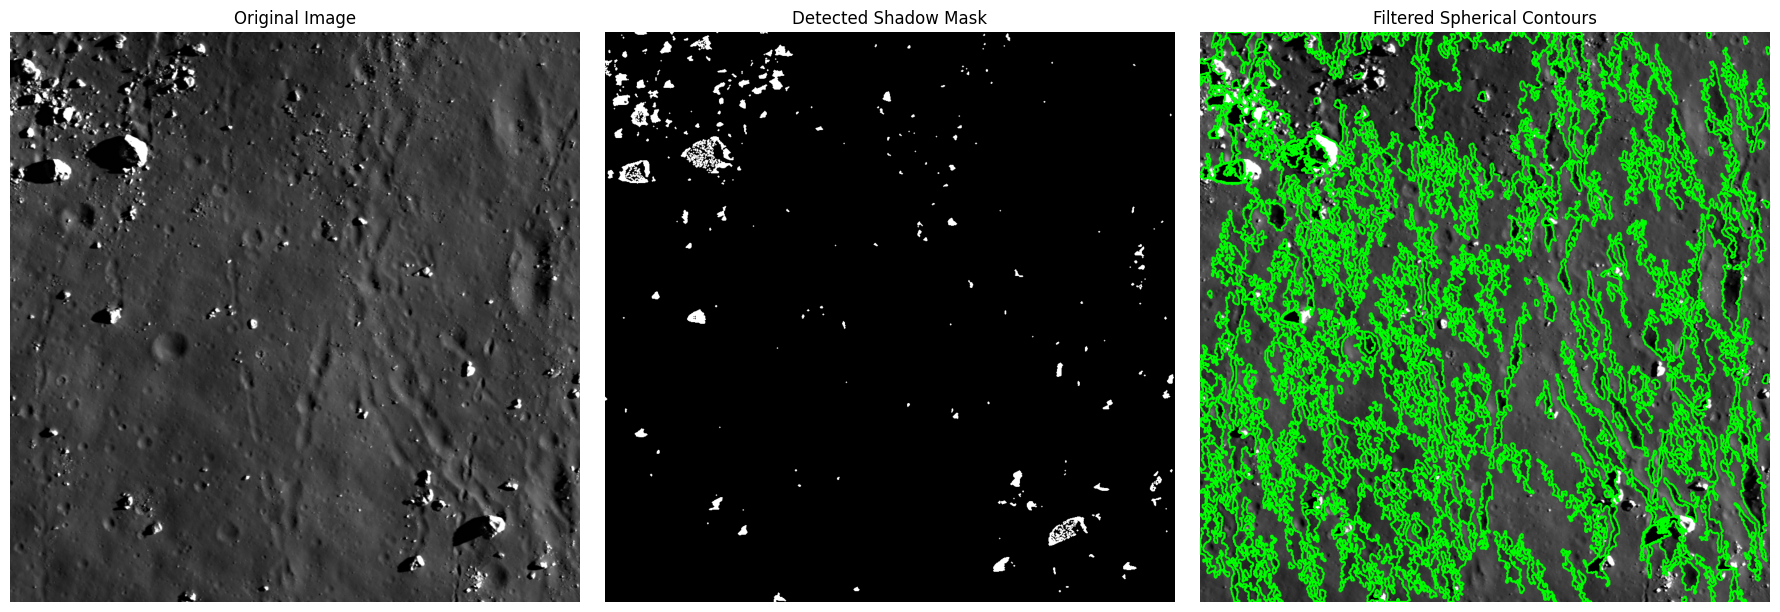

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# STEP 1: Read your uploaded image
image_path = "/content/M176791784RE_thumb.png"  # <- apni image ka path
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# STEP 2: Shadow detection using threshold
_, shadow_mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY_INV)

# STEP 3: Clean up shadow mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
cleaned_shadow = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)

# STEP 4: Find all contours
contours, _ = cv2.findContours(cleaned_shadow, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# STEP 5: Filter only spherical/elliptical contours
for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    if perimeter == 0:
        continue

    circularity = 4 * np.pi * (area / (perimeter * perimeter))
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = max(w, h) / (min(w, h) + 1e-5)

    # Updated logic:
    if (
        (0.6 < circularity < 1.2 and area > 50) or
        (area > 500 and aspect_ratio > 1.2) or     # Big non-circular shapes
        (circularity < 0.6 and area > 800)          # Very big, soft shapes
    ):
        filtered_contours.append(contour)



# STEP 6: Draw filtered contours only
filtered_img = img.copy()
cv2.drawContours(filtered_img, filtered_contours, -1, (0, 255, 0), 2)

# STEP 7: Display original, shadow mask, and result
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(cleaned_shadow, cmap='gray')
axs[1].set_title("Detected Shadow Mask")
axs[1].axis("off")

axs[2].imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
axs[2].set_title("Filtered Spherical Contours")
axs[2].axis("off")

plt.tight_layout()
plt.show()


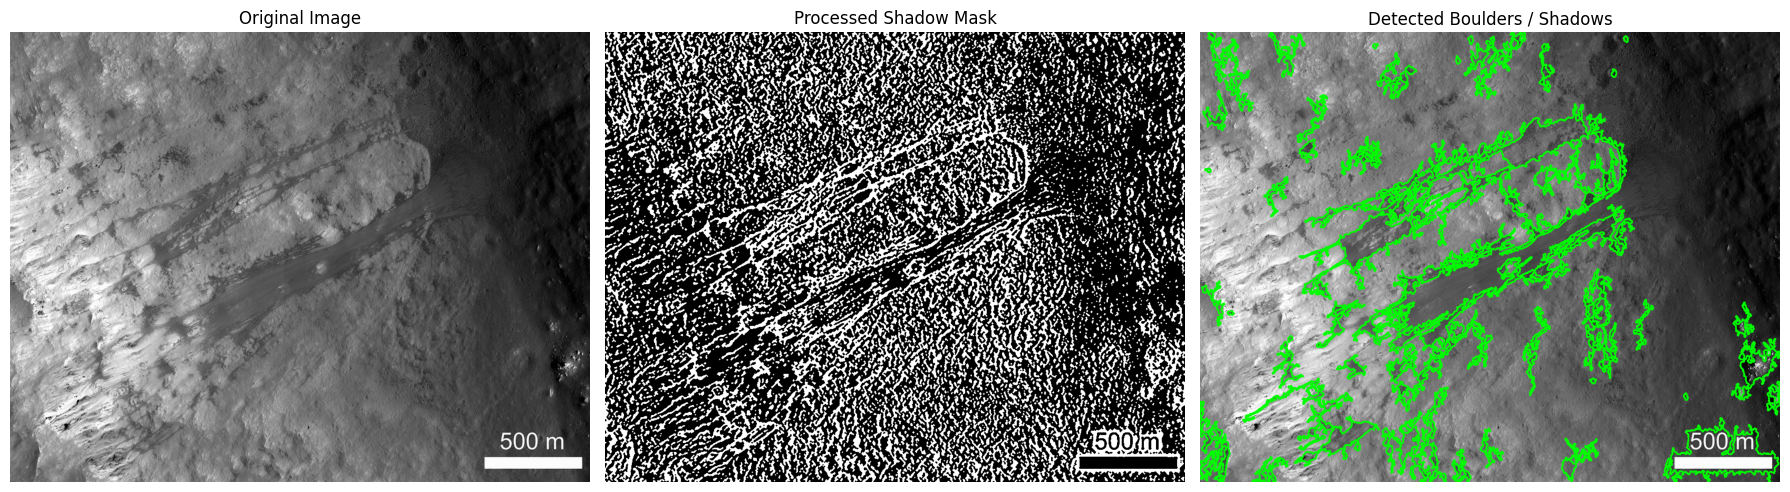

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# STEP 1: Read and preprocess the image
image_path = "/content/landslide2.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# STEP 2: Enhance contrast
gray = cv2.equalizeHist(gray)

# STEP 3: Apply Gaussian blur to smooth out noise
gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)

# STEP 4: Adaptive thresholding for better shadow detection
shadow_mask = cv2.adaptiveThreshold(
    gray_blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    15, 2
)

# STEP 5: Morphological cleanup (open + close)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opened = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

# STEP 6: Find all contours
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# STEP 7: Filter based on shape, area, and geometry
filtered_contours = []

for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    if perimeter == 0:
        continue

    circularity = 4 * np.pi * (area / (perimeter * perimeter))
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = max(w, h) / (min(w, h) + 1e-5)

    # Smart filtering
    if (
        (0.6 < circularity < 1.2 and area > 50) or
        (area > 500 and aspect_ratio > 1.2) or
        (circularity < 0.6 and area > 800)
    ):
        filtered_contours.append(contour)

# STEP 8: Draw results
filtered_img = img.copy()
cv2.drawContours(filtered_img, filtered_contours, -1, (0, 255, 0), 2)

# STEP 9: Display results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(closed, cmap='gray')
axs[1].set_title("Processed Shadow Mask")
axs[1].axis("off")

axs[2].imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
axs[2].set_title("Detected Boulders / Shadows")
axs[2].axis("off")

plt.tight_layout()
plt.show()


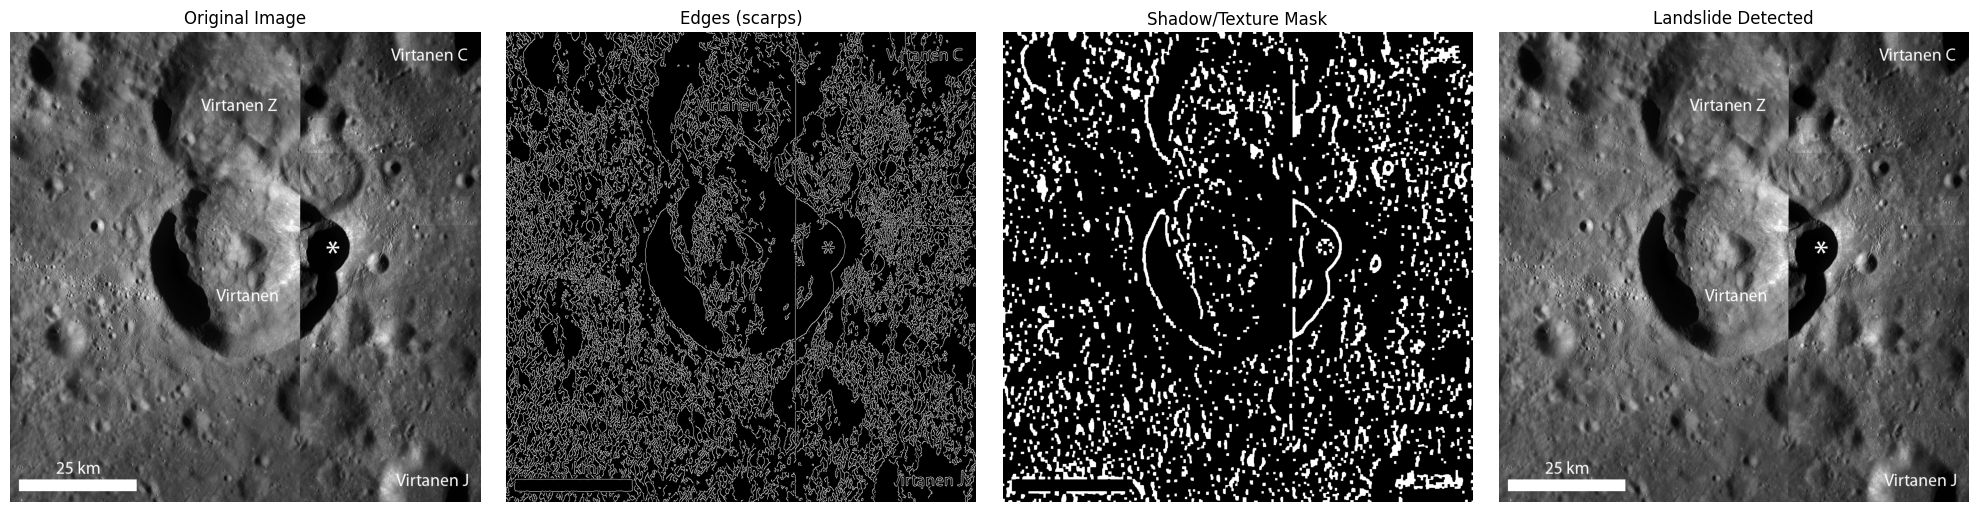

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Read and preprocess lunar image
image_path = "/content/landslide3.png"  # Apni image path yahan daalo
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)

# 2️⃣ Detect edges (landslide scarps + flow boundaries)
edges = cv2.Canny(gray_blur, threshold1=50, threshold2=120)

# 3️⃣ Shadow mask using adaptive threshold
shadow_mask = cv2.adaptiveThreshold(
    gray_blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    15, 3
)

# 4️⃣ Morphology to clean mask
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
opened = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

# 5️⃣ Combine edges + shadow mask for texture + flow detail
combined = cv2.bitwise_and(closed, edges)

# 6️⃣ Find contours (landslide regions)
contours, _ = cv2.findContours(combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 7️⃣ Filter by geometry (area, shape)
filtered = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 200:  # ignore tiny areas
        continue
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w / (h + 1e-5)
    if w > h * 1.2 or h > w * 1.2:  # long flow regions
        filtered.append(cnt)

# 8️⃣ Draw detected landslide zones
output = img.copy()
cv2.drawContours(output, filtered, -1, (0, 0, 255), 2)

# 9️⃣ Visualization
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); ax[0].set_title("Original Image"); ax[0].axis("off")
ax[1].imshow(edges, cmap='gray'); ax[1].set_title("Edges (scarps)"); ax[1].axis("off")
ax[2].imshow(closed, cmap='gray'); ax[2].set_title("Shadow/Texture Mask"); ax[2].axis("off")
ax[3].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)); ax[3].set_title("Landslide Detected"); ax[3].axis("off")
plt.tight_layout()
plt.show()


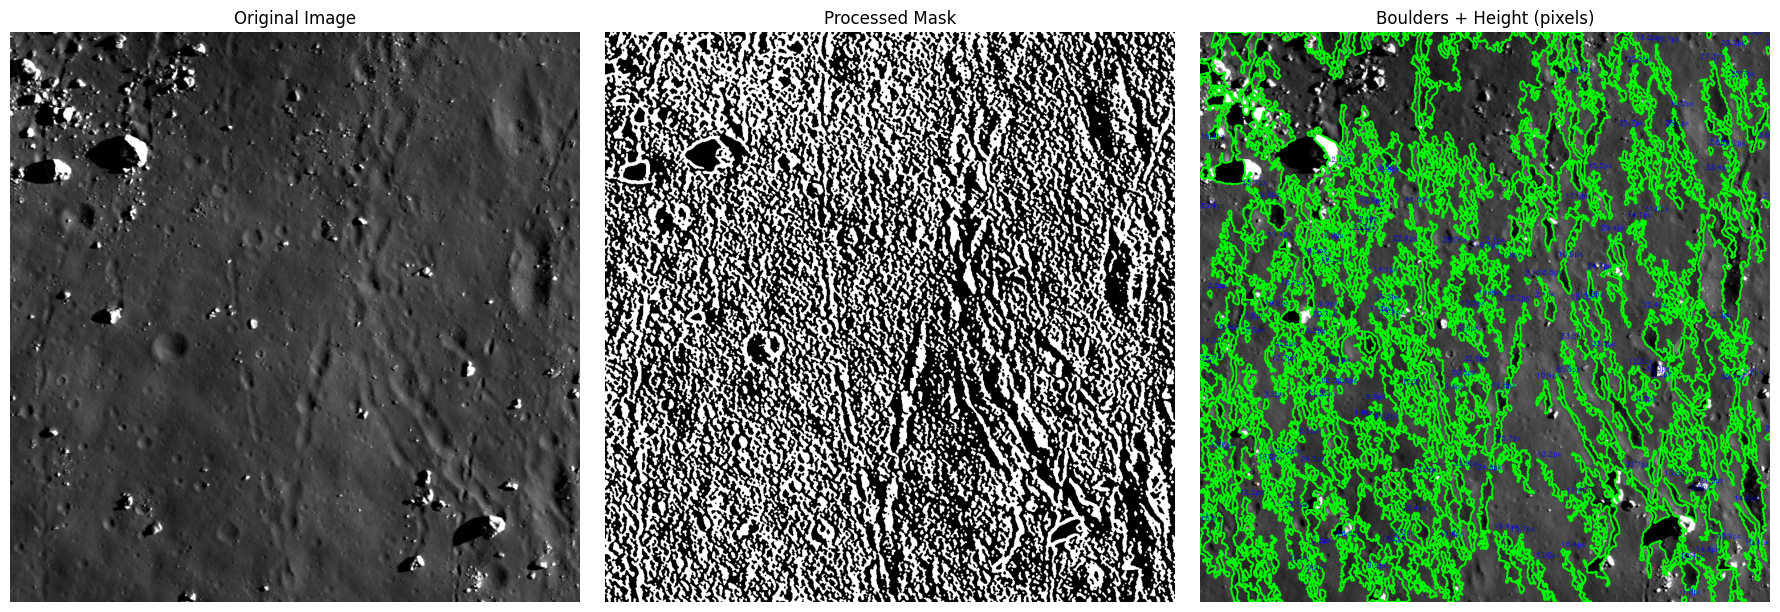

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
SOLAR_ELEVATION_DEG = 10  # You can update this as per image metadata
SOLAR_ELEVATION_RAD = math.radians(SOLAR_ELEVATION_DEG)

# STEP 1: Read and preprocess the image
image_path = "/content/M176791784RE_thumb.png"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)

# STEP 2: Shadow mask
shadow_mask = cv2.adaptiveThreshold(
    gray_blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    15, 2
)

# STEP 3: Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opened = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

# STEP 4: Contours
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

filtered_contours = []
heights = []

for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    if perimeter == 0:
        continue

    circularity = 4 * np.pi * (area / (perimeter * perimeter))
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = max(w, h) / (min(w, h) + 1e-5)

    # Filtering valid boulders
    if (
        (0.6 < circularity < 1.2 and area > 50) or
        (area > 500 and aspect_ratio > 1.2) or
        (circularity < 0.6 and area > 800)
    ):
        filtered_contours.append(contour)

        # Estimate shadow length (pixel-based)
        shadow_length = h  # or w depending on sun direction
        height = shadow_length * math.tan(SOLAR_ELEVATION_RAD)
        heights.append((x, y, height))  # store position + height

# STEP 5: Draw and annotate
output = img.copy()
cv2.drawContours(output, filtered_contours, -1, (0, 255, 0), 2)

for (x, y, height) in heights:
    label = f"{height:.1f}px"
    cv2.putText(output, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

# STEP 6: Show result
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(closed, cmap='gray')
axs[1].set_title("Processed Mask")
axs[1].axis("off")

axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[2].set_title("Boulders + Height (pixels)")
axs[2].axis("off")

plt.tight_layout()
plt.show()


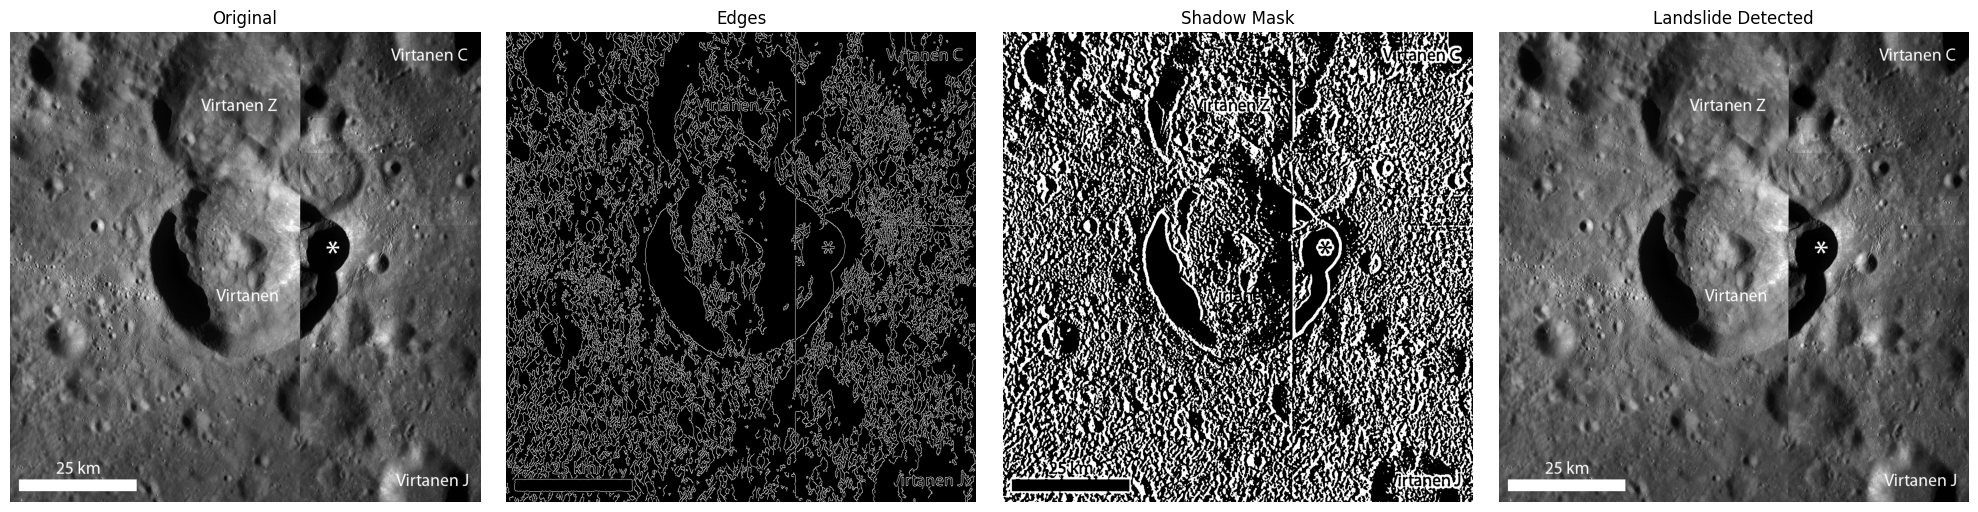

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# STEP 1: Load and preprocess image
image_path = "/content/landslide3.png"  # Replace with your image path
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# STEP 2: Edge detection (for scarps, boundaries)
edges = cv2.Canny(blurred, 50, 150)

# STEP 3: Adaptive threshold for shadow/texture region
shadow_mask = cv2.adaptiveThreshold(
    blurred, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 15, 3
)

# STEP 4: Morphological processing
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
cleaned_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)
cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_CLOSE, kernel)

# STEP 5: Combine shadow & edge info
combined = cv2.bitwise_and(cleaned_mask, edges)

# STEP 6: Find and filter contours based on "landslide-like" shape
contours, _ = cv2.findContours(combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
landslide_like = []

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 200:  # Skip tiny noise
        continue

    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = max(w, h) / (min(w, h) + 1e-5)  # Avoid divide by zero

    if aspect_ratio > 2.0 and area > 300:
        landslide_like.append(cnt)

# STEP 7: Draw detections
output = img.copy()
cv2.drawContours(output, landslide_like, -1, (0, 0, 255), 2)

for cnt in landslide_like:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.putText(output, "Landslide?", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# STEP 8: Show results
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); axs[0].set_title("Original"); axs[0].axis("off")
axs[1].imshow(edges, cmap="gray"); axs[1].set_title("Edges"); axs[1].axis("off")
axs[2].imshow(shadow_mask, cmap="gray"); axs[2].set_title("Shadow Mask"); axs[2].axis("off")
axs[3].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)); axs[3].set_title("Landslide Detected"); axs[3].axis("off")
plt.tight_layout()
plt.show()
